GOAL: To Create a model to predict whether or not a customer will Churn 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/nitheeshvarma/Desktop/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Exploratory Data Analysis


In [6]:
# finding if there are any missing values that need to be handled.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Countplot displaying the balance of the class labels (Churn)

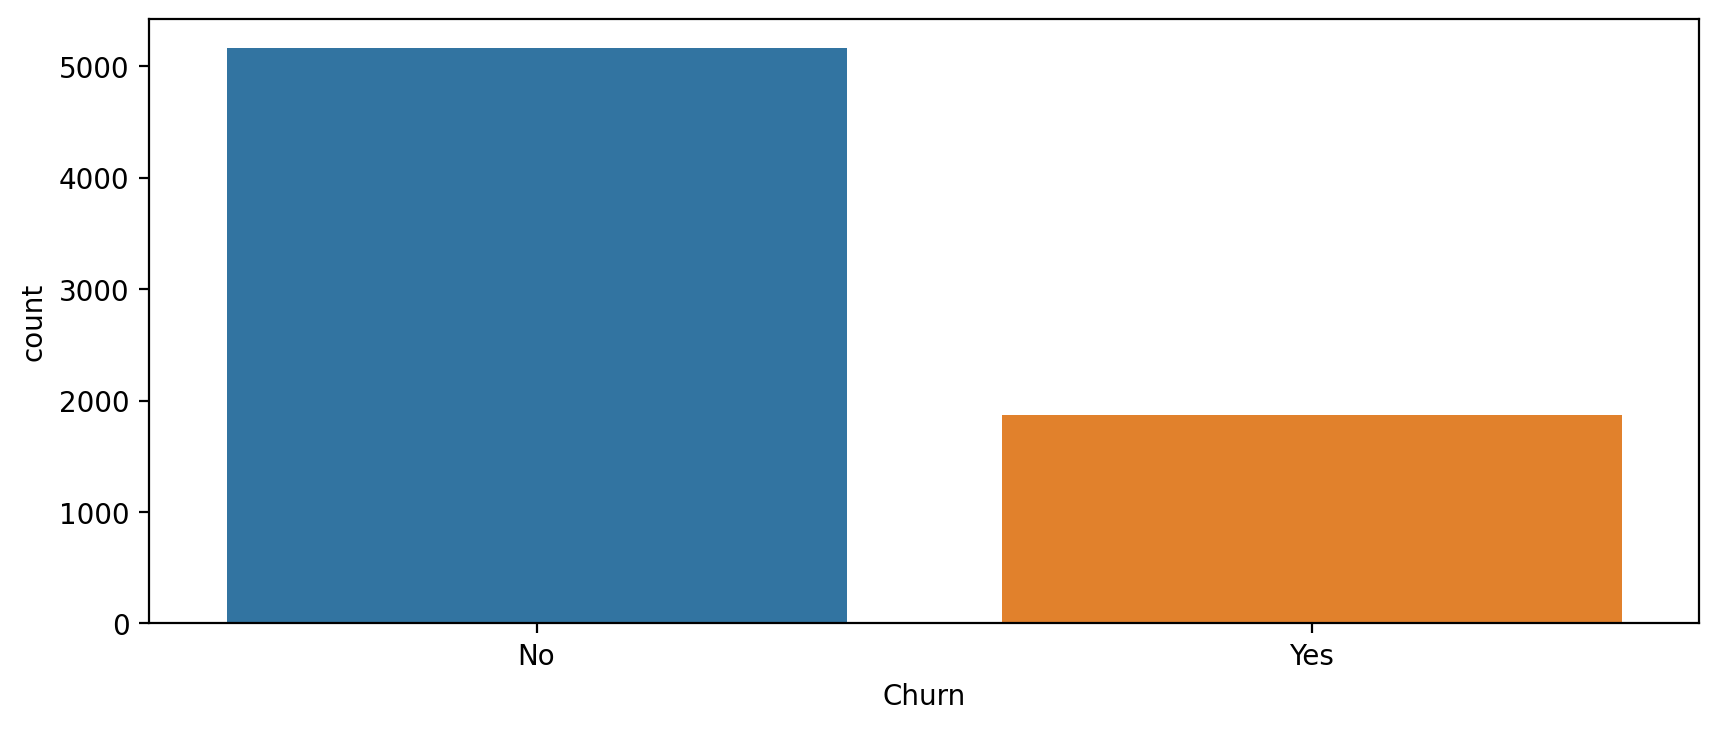

In [7]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='Churn',data=df);

Exploring the distrbution of TotalCharges between Churn categories with a Box Plot and Violin Plot.

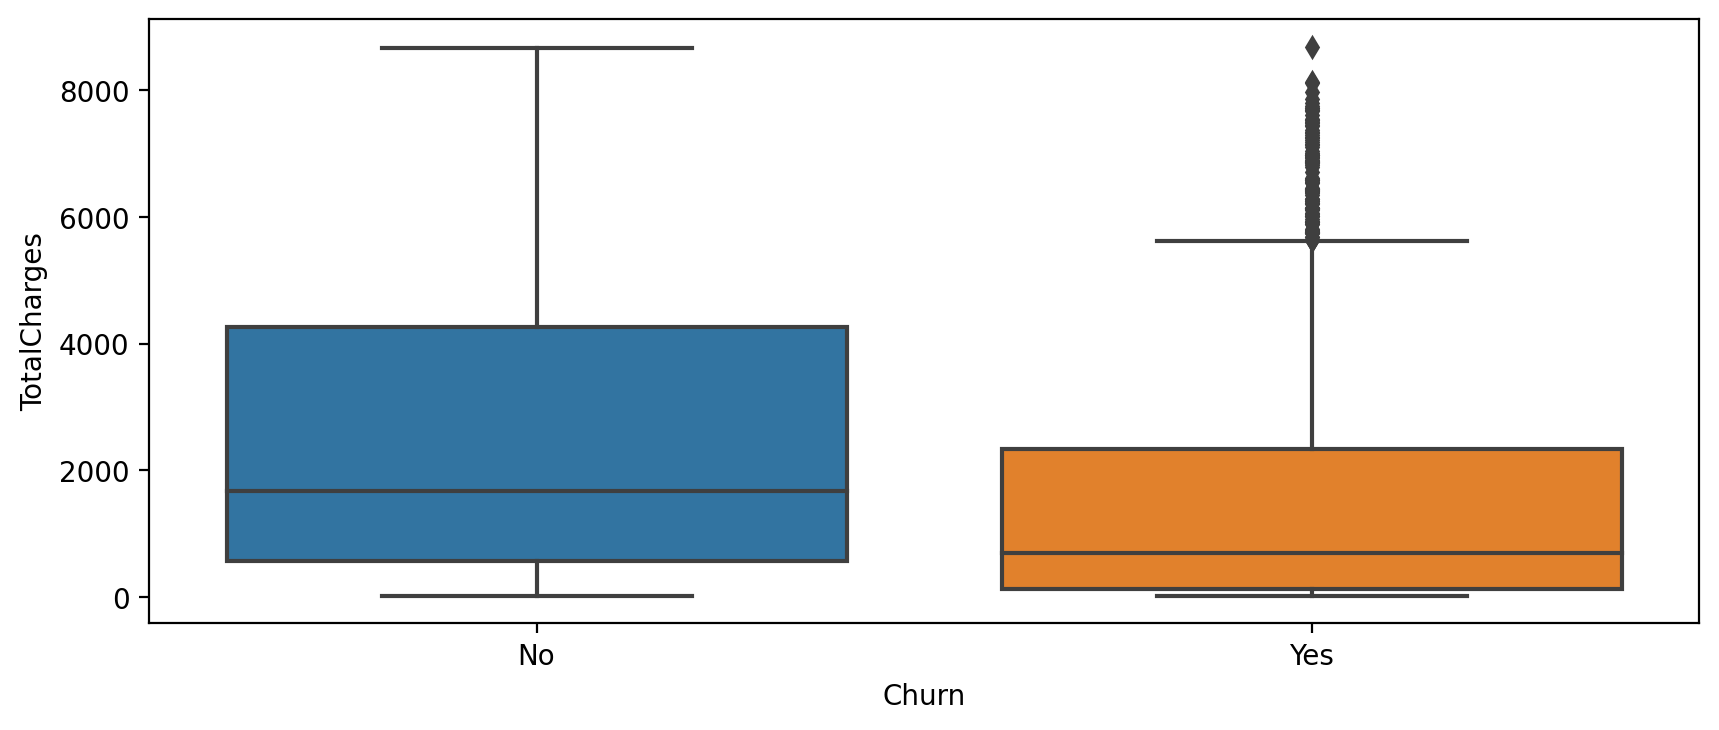

In [8]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(y='TotalCharges',data=df,x='Churn');

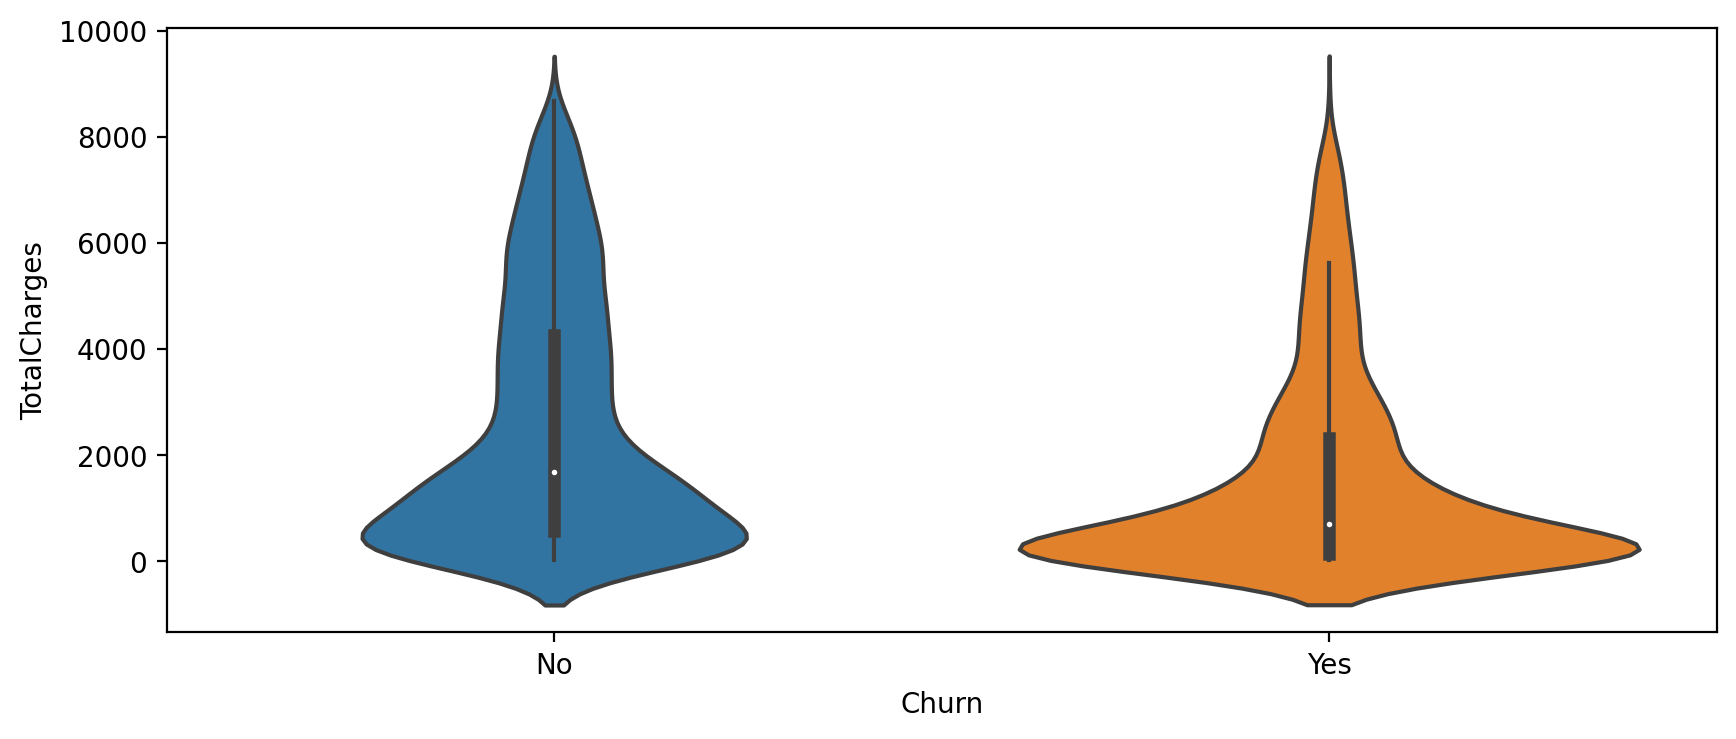

In [9]:
plt.figure(figsize=(10,4),dpi=200)
sns.violinplot(y='TotalCharges',data=df,x='Churn');

Boxplot showing the distribution of TotalCharges per Contract type, also adding in a hue coloring based on the Churn class.

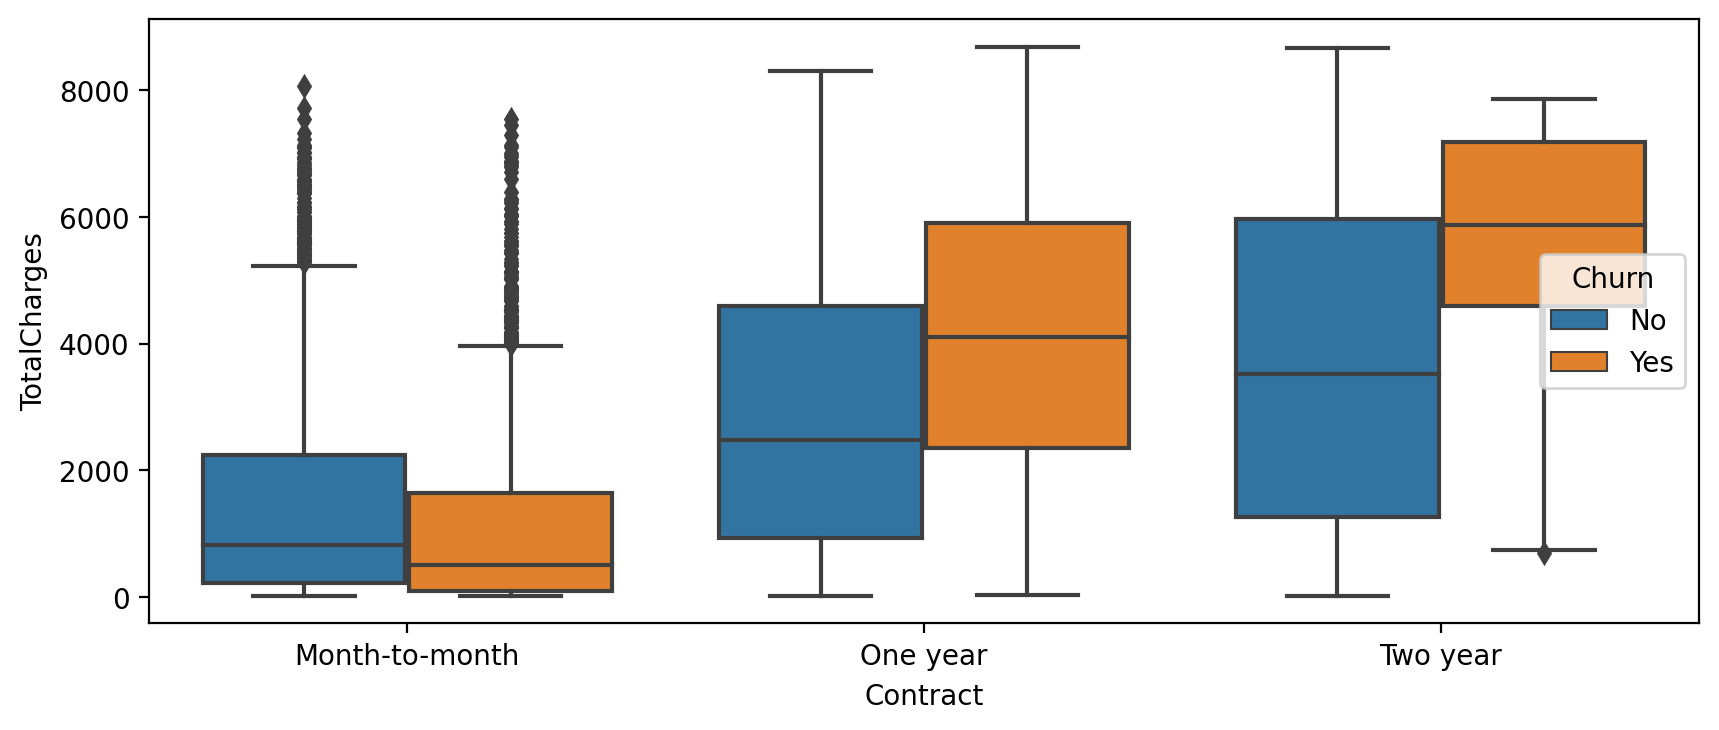

In [10]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(x='Contract',y='TotalCharges',data=df,hue='Churn');

In [11]:
df2 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]
df2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,No,Yes,No,No,DSL,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,Yes,No,Yes,No,DSL,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,Yes,Yes,No,No,DSL,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,Yes,No,Yes,Yes,DSL,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,No,No,No,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check,Yes


In [12]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'InternetService', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [13]:
k = pd.get_dummies(df2)

In [14]:
k.corr()['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [15]:
v= k.corr()['Churn_Yes'].sort_values().iloc[1:-1]

In [16]:
v.values

array([-0.30155234, -0.22757762, -0.22757762, -0.22757762, -0.22757762,
       -0.22757762, -0.22757762, -0.22757762, -0.19145432, -0.17822502,
       -0.17126992, -0.16471591, -0.16312844, -0.14998193, -0.13468684,
       -0.12414143, -0.118136  , -0.09077285, -0.08230697, -0.06619252,
       -0.0326536 , -0.0116914 , -0.0116914 , -0.00854464,  0.00854464,
        0.0116914 ,  0.04003274,  0.06085994,  0.06325398,  0.12843503,
        0.1309203 ,  0.14998193,  0.15054105,  0.16312844,  0.19145432,
        0.25205563,  0.26759512,  0.30145464,  0.30746259,  0.3368771 ,
        0.3422352 ,  0.40456455])

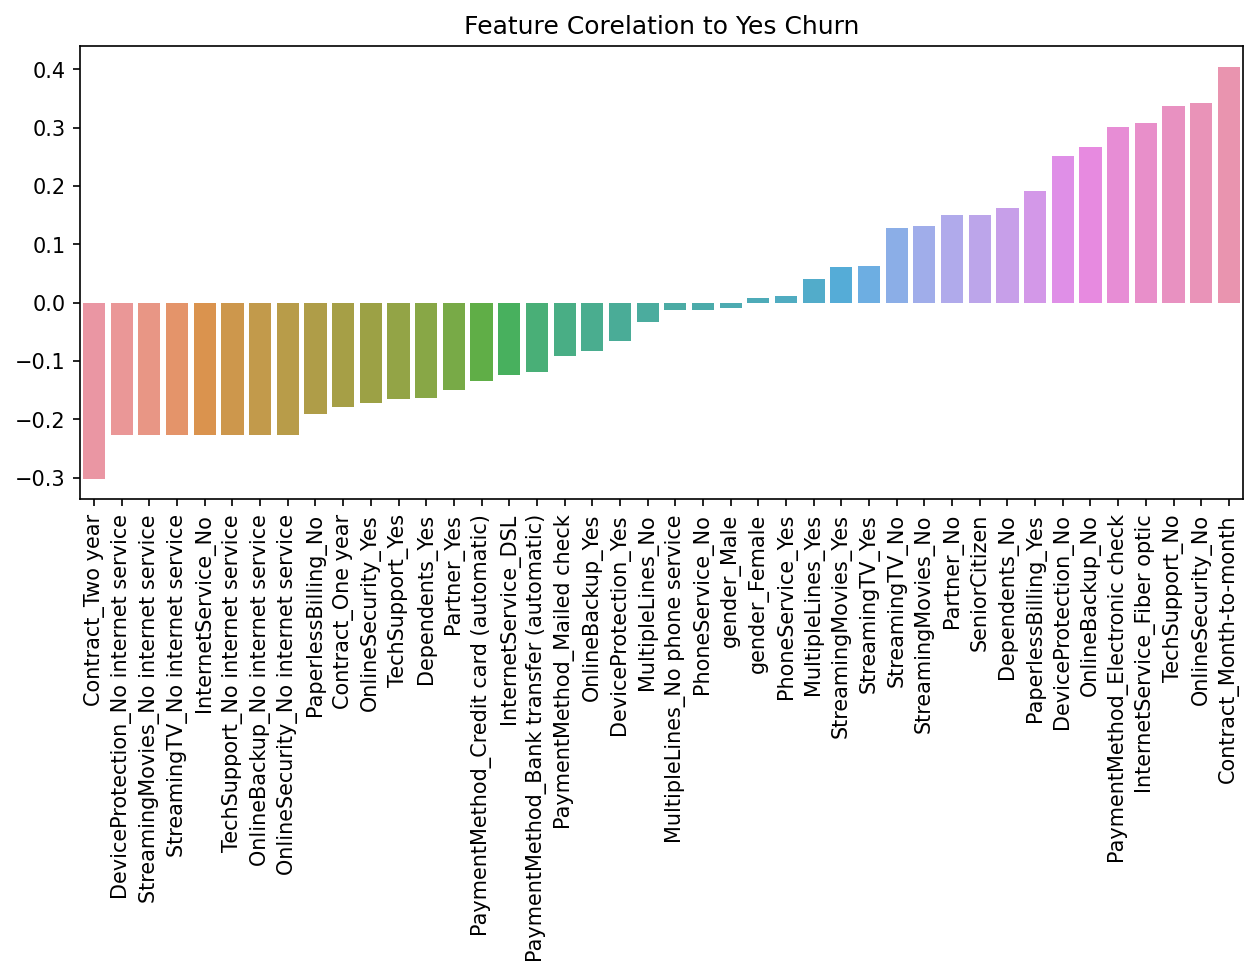

In [17]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x=v.index,y=v.values)
plt.title('Feature Corelation to Yes Churn')
plt.xticks(rotation=90);

Churn Analysis:

Segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Plotting a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been a customer.

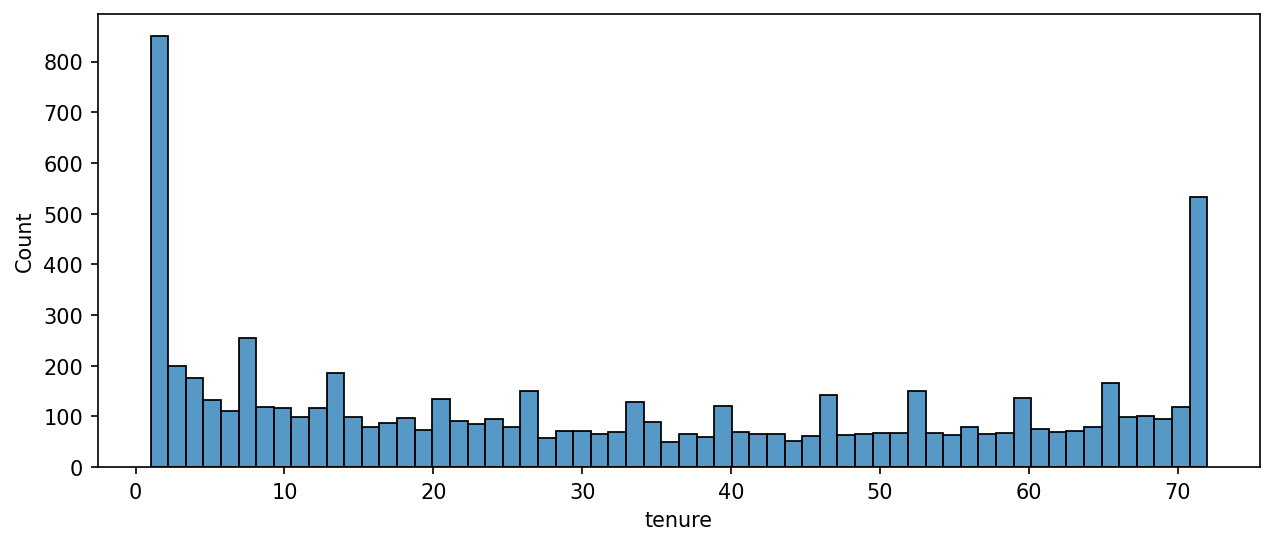

In [20]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(x='tenure',data=df,bins=60);

Creating histograms separated by two additional features, Churn and Contract.

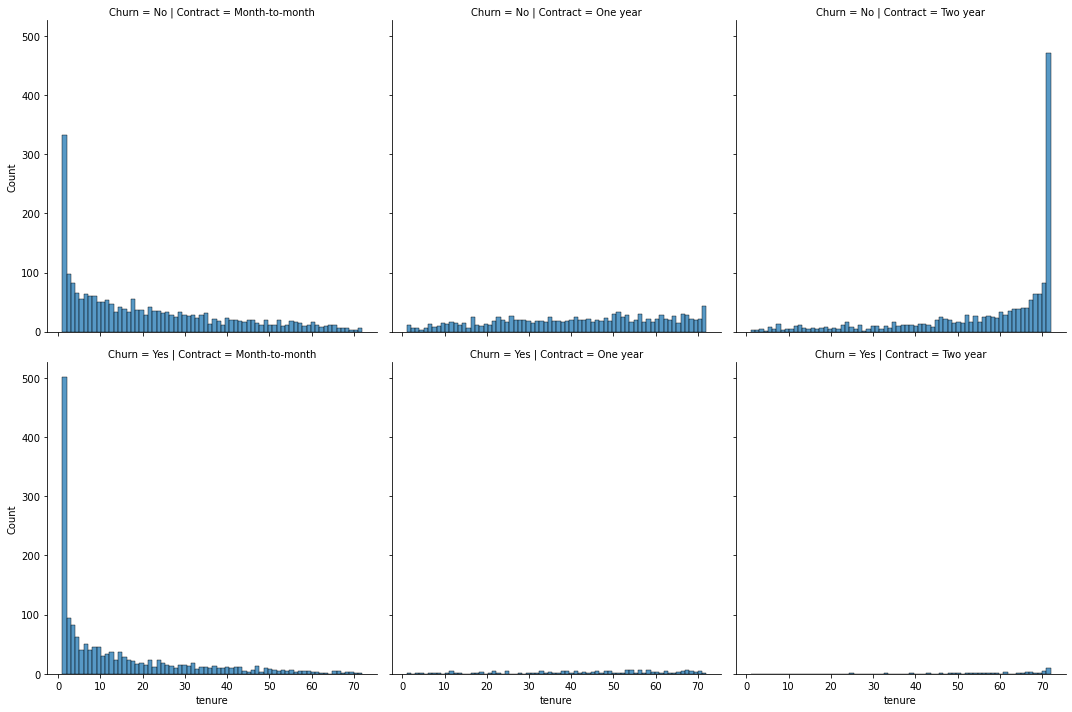

In [21]:
sns.displot(data=df,x='tenure',bins=70,row='Churn',col='Contract');

Scatter plot of Total Charges versus Monthly Charges, also adding in a hue coloring based on the Churn class.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

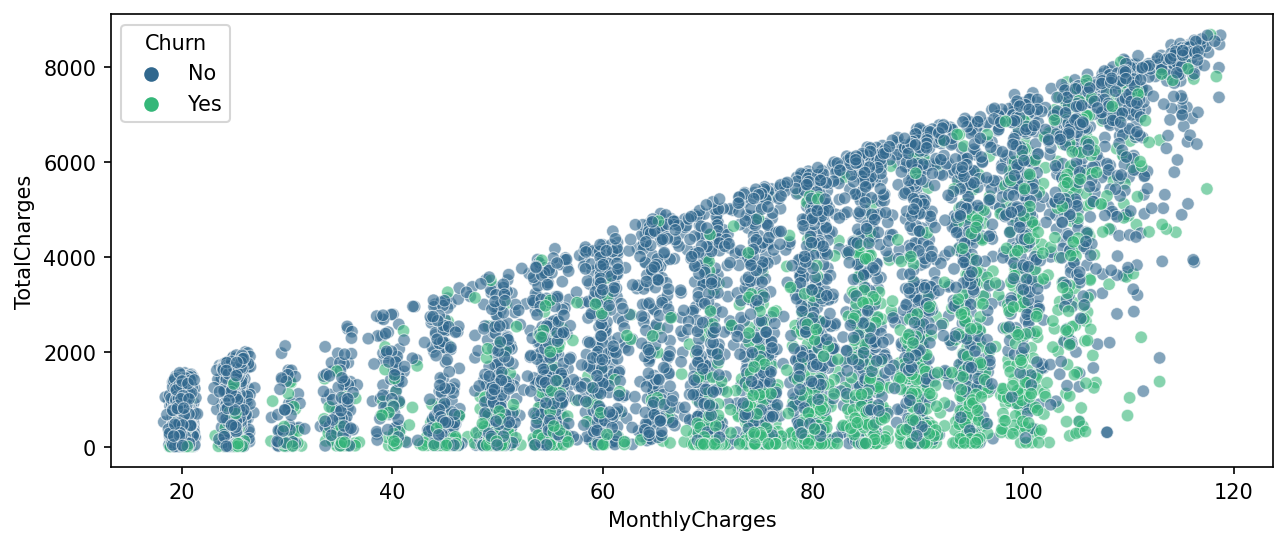

In [22]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(y='TotalCharges',x='MonthlyCharges',hue='Churn',data=df,palette='viridis',alpha=0.6)

Creating Cohorts based on Tenure

In [23]:
k = df.sort_values(by='tenure')
k.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
6624,4415-IJZTP,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.50,74.50,Yes
4283,7734-DBOAI,Female,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,Yes,Yes,No,Month-to-month,No,Electronic check,40.10,40.10,Yes
6614,9248-OJYKK,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,76.45,Yes
1366,6567-HOOPW,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.20,79.20,Yes


In [24]:
k[k['tenure']==1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
6624,4415-IJZTP,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.50,74.50,Yes
4283,7734-DBOAI,Female,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,Yes,Yes,No,Month-to-month,No,Electronic check,40.10,40.10,Yes
6614,9248-OJYKK,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,76.45,Yes
1366,6567-HOOPW,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.20,79.20,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,9637-EIHEQ,Female,0,No,No,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,50.80,50.80,Yes
7007,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
5279,8058-INTPH,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.65,79.65,Yes
367,7302-ZHMHP,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.15,19.15,No


In [25]:
k[k['tenure']==1]['Churn'].value_counts()['Yes']

380

In [26]:
ls = list(range(1,73))

In [27]:
(380/613)*100

61.99021207177814

In [28]:
len(k[k['tenure']==1])

613

In [29]:
ls = list(range(1,73))
val = []
for x in ls:
    v1 = k[k['tenure']==x]['Churn'].value_counts()['Yes']
    v2 = len(k[k['tenure']==x])
    perc = (v1/v2)*100
    val.append(perc)

In [30]:
f = pd.DataFrame(data=val,index=ls,columns=['cohort'])
f

,cohort
1,61.990212
2,51.680672
3,47.000000
4,47.159091
5,48.120301
...,...
68,9.000000
69,8.421053
70,9.243697
71,3.529412


Creating a plot showing churn rate per months of tenure.

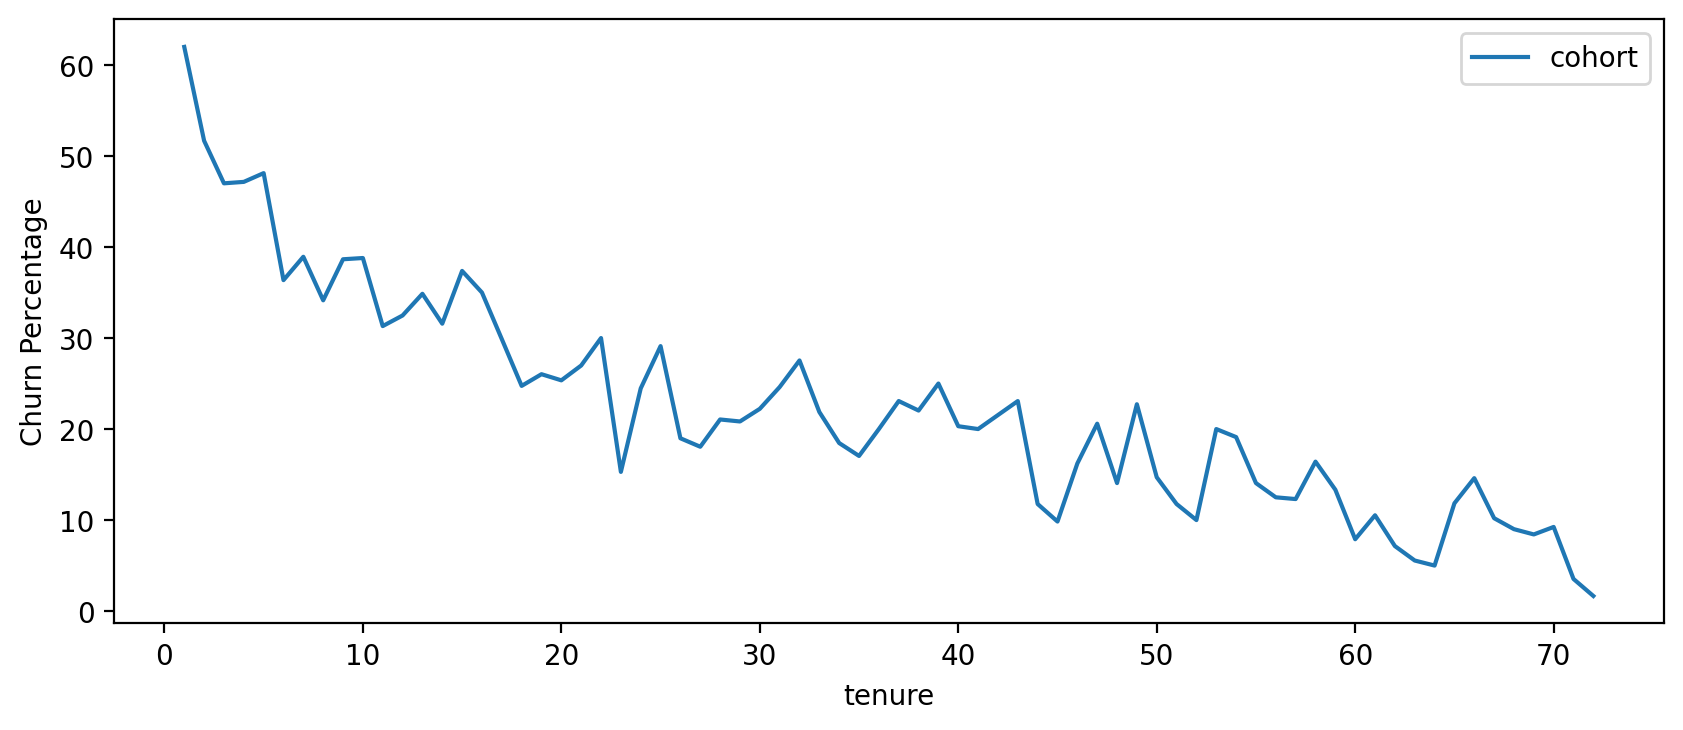

In [31]:
plt.figure(figsize=(10,4),dpi=200)
sns.lineplot(data=f)
plt.xlabel('tenure')
plt.ylabel('Churn Percentage');

Creating a new column called Tenure Cohort that creates 4 separate categories:
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [32]:
def ten_col(val):
    if val in range(0,12):
        return '0-12 Months'
    elif val in range(12,24):
        return '12-24 Months'
    elif val in range(24,48):
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [33]:
df_copy = df.copy()

In [34]:
df_copy['Tenure Cohort'] = np.vectorize(ten_col)(df_copy['tenure'])

In [35]:
df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [36]:
df_copy[['tenure','Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


Scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.

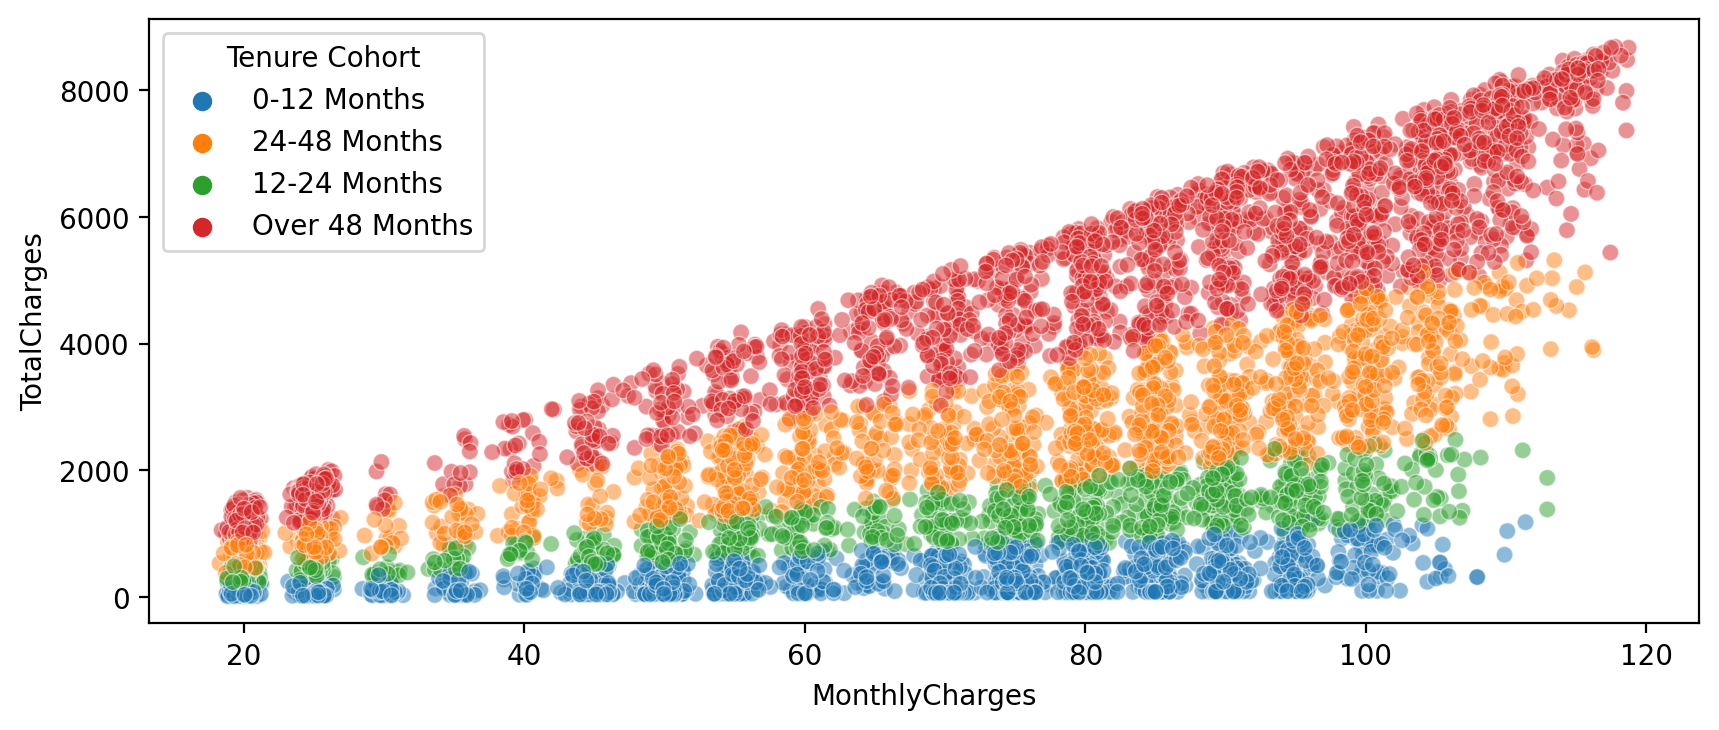

In [37]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df_copy,hue='Tenure Cohort',alpha=0.5);

Creating a count plot showing the churn count per cohort.

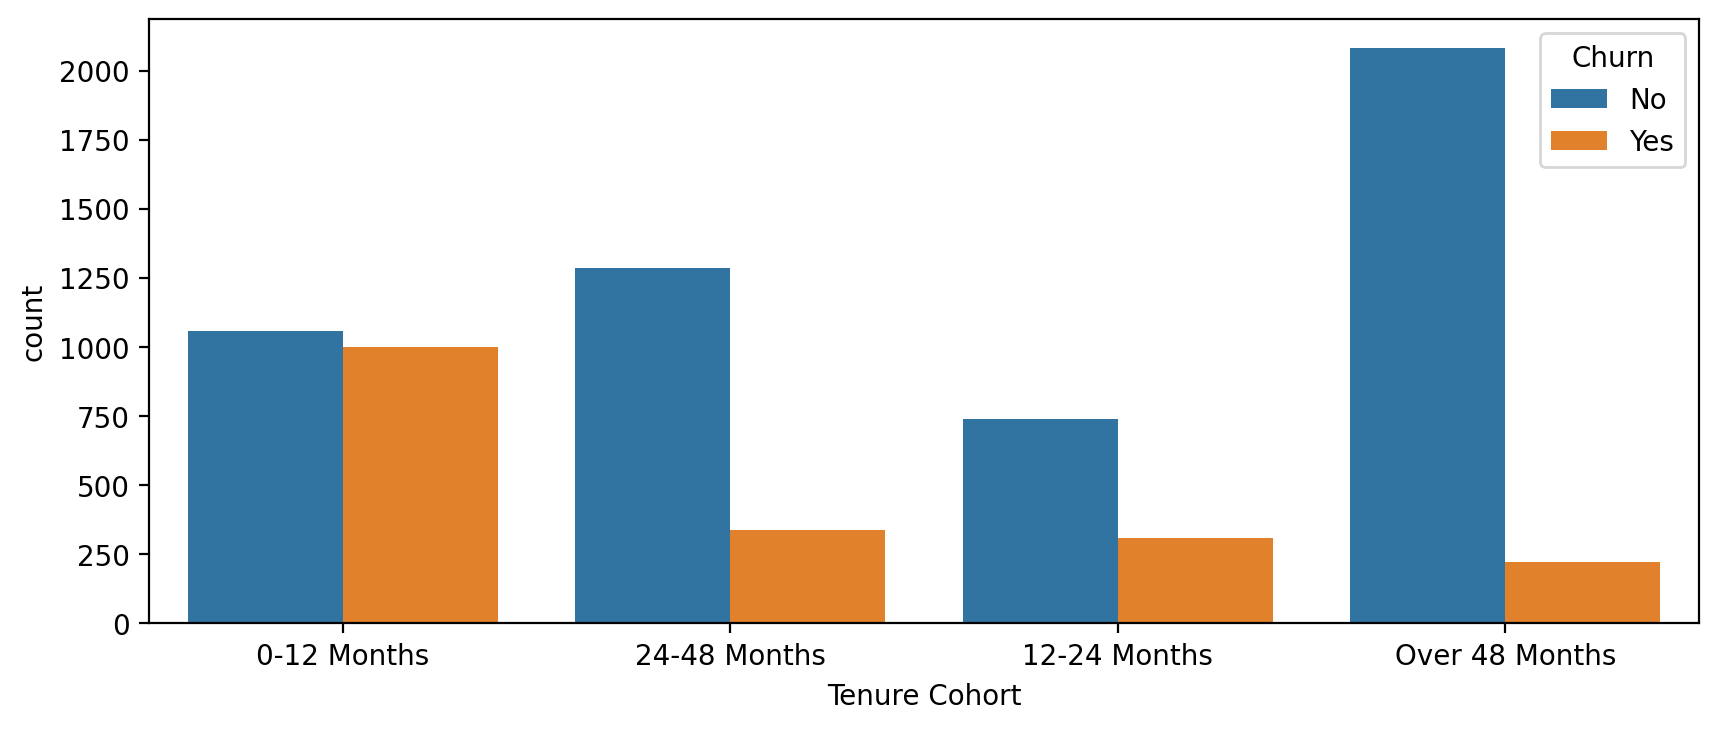

In [38]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='Tenure Cohort',data=df_copy,hue='Churn');

Creating a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.

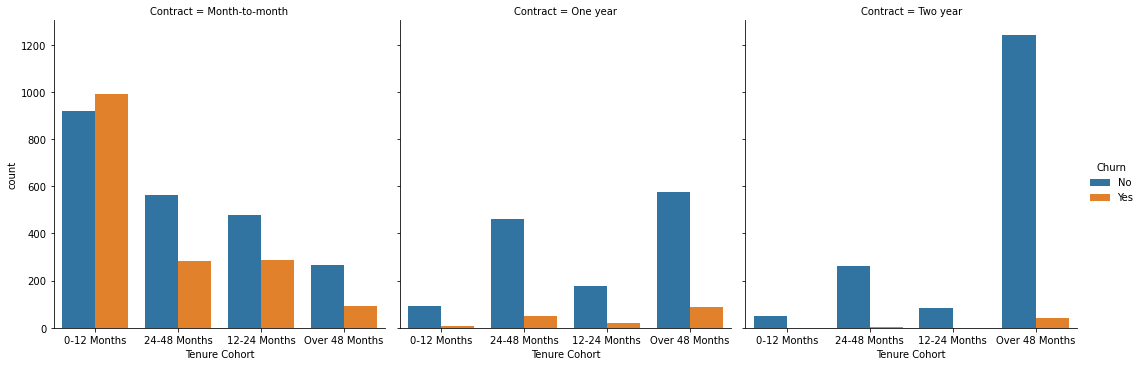

In [39]:
sns.catplot(x='Tenure Cohort',hue='Churn',data=df_copy,kind='count',col='Contract');

Predictive Modeling


Single Decision Tree:

In [40]:
#CODE HERE
df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [41]:
y = df_copy['Churn']

In [42]:
X = df_copy.drop(['Churn','customerID'],axis = 1)

In [43]:
X = pd.get_dummies(X,drop_first=True)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [46]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [49]:
tree_model = DecisionTreeClassifier()

In [50]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9]}

In [51]:
grid = GridSearchCV(estimator=tree_model,param_grid=param_grid)

In [52]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]})

In [53]:
pre = grid.predict(X_test)

In [54]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [55]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



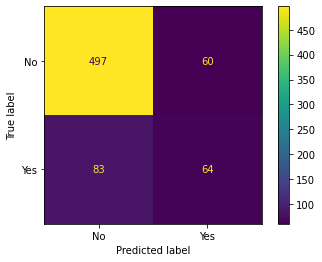

In [56]:
plot_confusion_matrix(grid,X_test,y_test)

In [57]:
tree_model_2 = DecisionTreeClassifier(criterion='gini',max_depth=6)

In [58]:
tree_model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [59]:
p = tree_model_2.predict(X_test)

In [60]:
tree_model_2.feature_importances_

array([0.0126805 , 0.42391407, 0.04348553, 0.06494213, 0.00123697,
       0.        , 0.        , 0.00785158, 0.        , 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.02628952, 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [61]:
X_train.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure Cohort_12-24 Months', 'Tenure Cohort_24-48 Months',
       'Tenure Cohort_Over 48 Months'],
      dtype='object')

In [62]:
gp = tree_model_2.feature_importances_
gp.sort()
gp

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00123697, 0.00534132,
       0.00785158, 0.00786752, 0.00837585, 0.01002118, 0.01243191,
       0.0126805 , 0.02628952, 0.02706543, 0.03443632, 0.04348553,
       0.06494213, 0.31406016, 0.42391407])

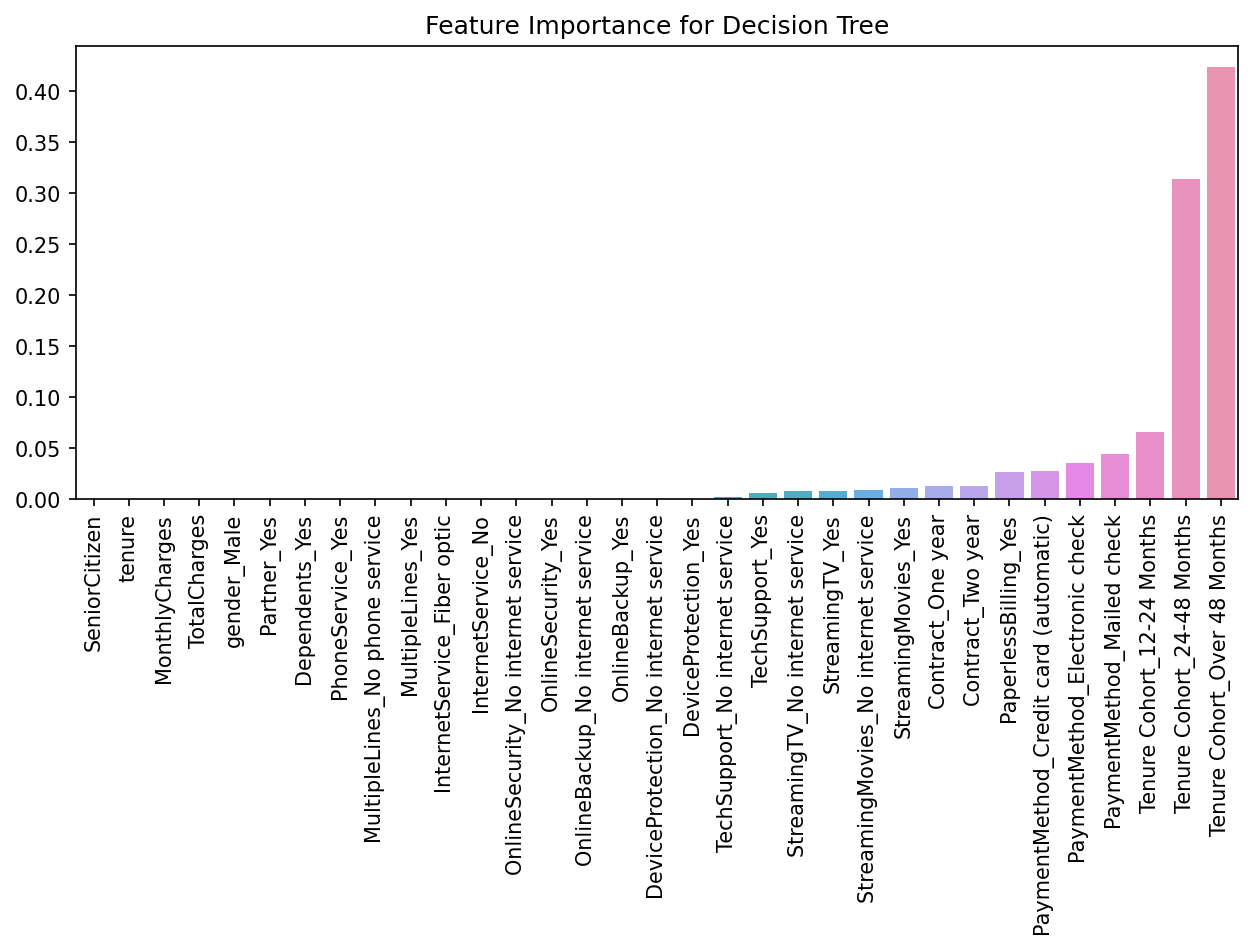

In [63]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(y=gp,x=X_train.columns)
plt.title('Feature Importance for Decision Tree')
plt.xticks(rotation=90);

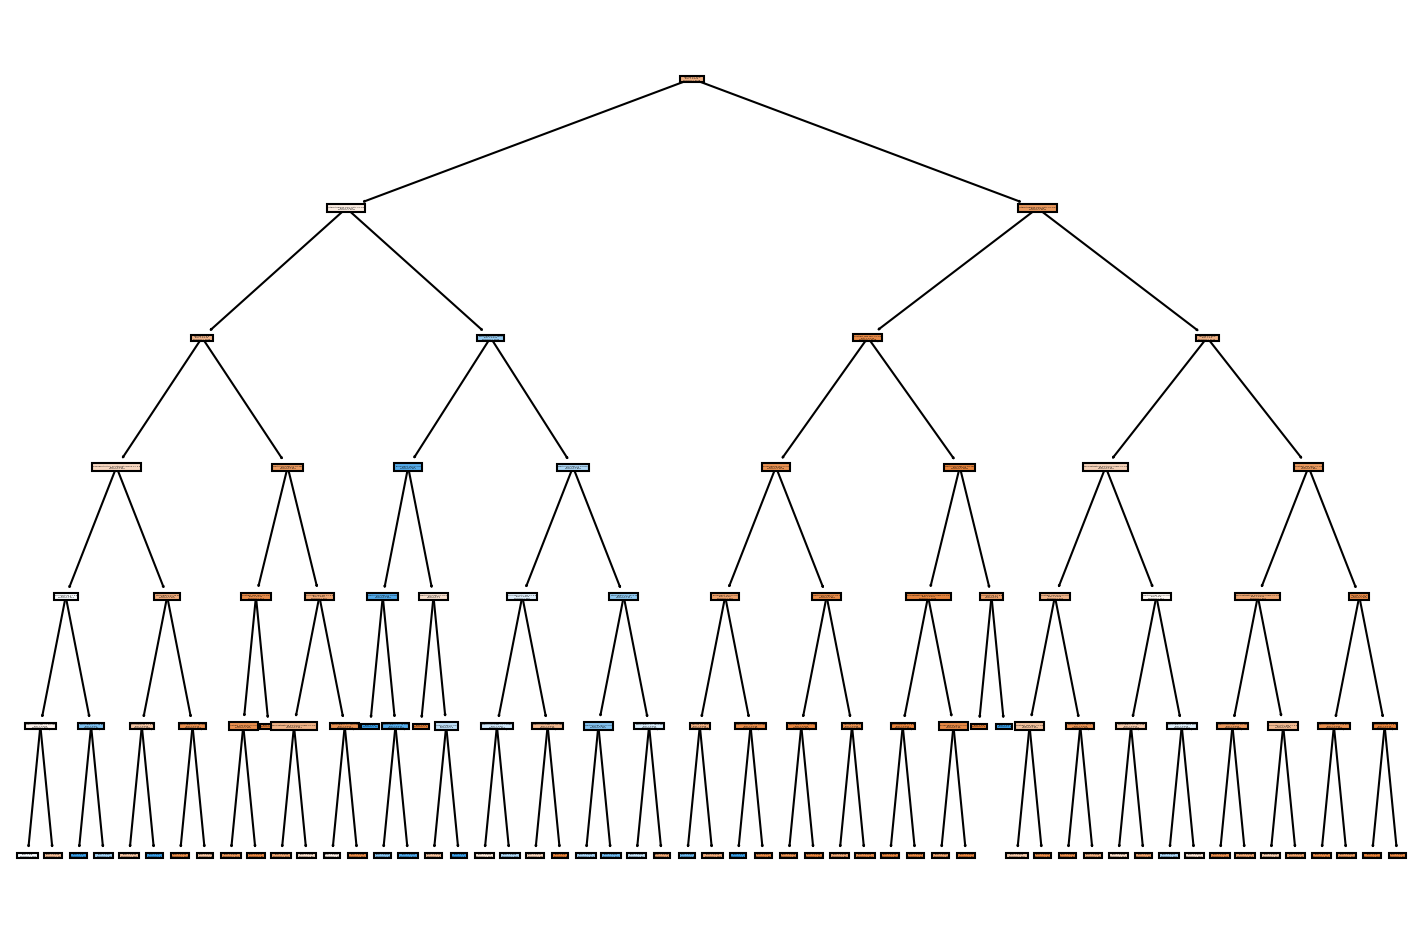

In [64]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree_model_2,filled=True,feature_names=X.columns);

Random Forests:

In [65]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [66]:
rdf = RandomForestClassifier()

Creating a function to fit the data into different models, find predictions,plot confusion matrix and print the classification report 

In [67]:
def model(val):
    mod = val
    mod.fit(X_train,y_train)
    pre = mod.predict(X_test)
    print(classification_report(y_test,pre))
    return plot_confusion_matrix(mod,X_test,y_test)

              precision    recall  f1-score   support

          No       0.87      0.90      0.88       557
         Yes       0.56      0.48      0.51       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



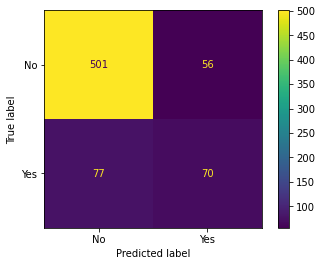

In [68]:
model(rdf)

ADA Boost :

In [69]:
ada = AdaBoostClassifier()

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



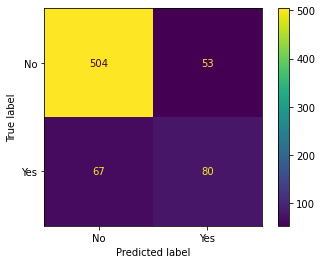

In [70]:
model(ada)

Gradient Boost:

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.58      0.50      0.54       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.82       704



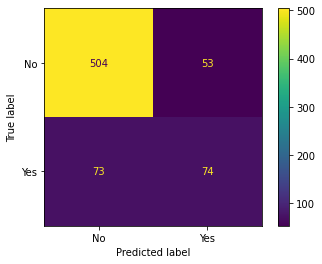

In [71]:
grad = GradientBoostingClassifier()
model(grad)

From the above results, we can conclude that the ADA Boost Classifier gives us the best performance metrics and prediction results.